### 패션 상품 이미지 분류하기 목차

* [Chapter 1 활성화 함수](#chapter1)
* [Chapter 2 LeNet 모델 만들기](#chapter2)

### Chapter 1 활성화 함수 <a class="anchor" id="chapter1"></a>
1. 활성화 함수 
   - 뉴런의 출력 값을 어떻게 변환할지 결정하는 역활을 한다.
   - 비선형(non-liner) 변환을 수행하여 모델이 복잡한 문제를 해결할 수 있도록 도움을 준다.

2. 시그모이드 함수(sigmoid function)
   - 로지스틱 함수(logistic function)라고 부른다.
   - 이 함수를 그래프로 그래면 S자 형태를 띤다.
   - x가 큰 양수일 때는 1에 가까워지고 x가 큰 음수일 때는 0에 가까워진다.
   - 0과 1사이의 값으로 변환해준다.

   ![시그모이드 함수](image/02-03-01-sigmoid.png)    

3. 렐루 함수(ReLu)
   - x가 양수이면 x그대로 가고, x가 음수이면 0으로변경
   - 모델의 출력 값에서 양수는 그대로 보내고, 음수는 제거한다.

    ![렐루 함수](image/02-03-02-Relu.png)    

4. 시그모이드 함수는 x값의 절대 값이 커지면 기울기가 완만해진다.
   - 신경망은 경사 하강법(gradient decent)을 사용해 훈련하기 때문에 기울기가 완만해지면 오차에 대한 조정이 더뎌진다.
   - 기울기 소실(gradient vanishing)을 개선하기 위해서 렐루나 렐루의 변종함수를 사용하고있다.

5. 소프트맥스 함수
   - 딥러닝에서 분류 문제를 해결할 때 자주사용하는 함수로, 특히 모델이 여러 카테고리 중 하나를 예측할 때 사용된다.
   - 모든 출력을 합하면 1이 된다.

       ![소프트맥스 함수](image/02-03-03-softmax.png)    

6. 원-핫 인코딩
   - 정수 값을 배열의 인덱스로 생각해 해당 인덱스 위치의 원소만 1로, 나머지는 0인 벡터로 변환하는 인코딩방식       

        ![원핫인코딩](image/02-03-04-onehot.png)    
      

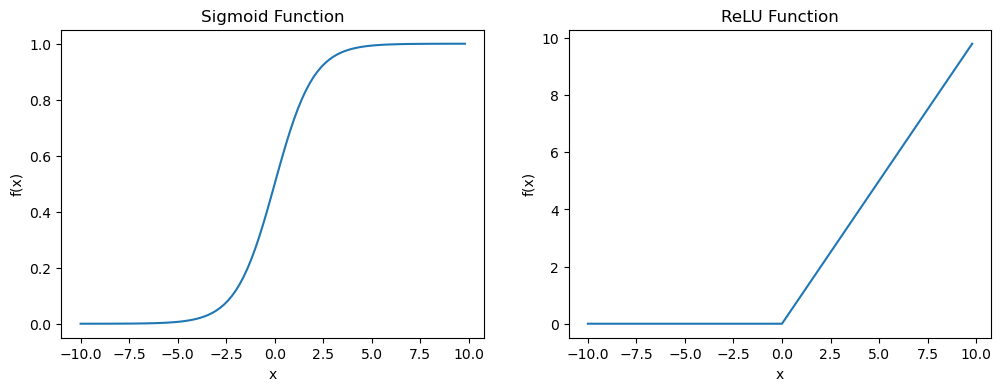

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit

# -10 ~ 10 사이에서 0.2 간격의 실수값 배열 생성
x = np.arange(-10, 10, 0.2)
#print(x)

# 1 : 행 개수
# 2 : 열 개수
# figsize : 그래프 크기 지정
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# 첫 번째 그래프 - 시그모이드 함수
# 사이파이에서 제공하는 expit 함수로 시그모이드 함수를제공
axs[0].set_title('Sigmoid Function')
axs[0].plot(x, expit(x))
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x)')

# 두 번째 그래프 - 렐루 함수
# clip(0) : 0보다 작은 값은 0으로 변환
axs[1].set_title('ReLU Function')
axs[1].plot(x, x.clip(0))
axs[1].set_xlabel('x')
axs[1].set_ylabel('f(x)')

plt.show()

### Chapter 2 LeNet 모델 만들기 <a class="anchor" id="chapter2"></a>
1. 케라스의 Sequential 클래스를 사용해 모델을 만들고, layers 모듈을 사용해 층을 추가한다.

In [9]:
import keras
from keras import layers

lenet5 = keras.Sequential()

# 입력층 크기 지정 크기 28*28, 채널 1(흑백)
lenet5.add(layers.Input(shape=(28, 28, 1)))

# 합성곱층1 - 필터 6개, 필터 크기 5*5, 활성화 함수 시그모이드, 패딩 방식 same
lenet5.add(layers.Conv2D(filters=6, kernel_size=(5,5), activation='sigmoid', padding='same'))

# 풀링층1 - 풀링 크기 2*2, 스트라이드 2, 패딩 방식 valid
lenet5.add(layers.AveragePooling2D(pool_size=2))

# 합성곱층2 - 필터 16개, 필터 크기 5*5, 활성화 함수 시그모이드, 패딩 방식 valid
lenet5.add(layers.Conv2D(filters=16, kernel_size=(5,5), activation='sigmoid', padding='valid'))

# 풀링층2 - 풀링 크기 2*2, 스트라이드 2, 패딩 방식 valid
lenet5.add(layers.AveragePooling2D(pool_size=2))

# 3차원 특성맵을 1차원으로 펼친다.
lenet5.add(layers.Flatten())

# 밀집층1 - 뉴런 120개, 활성화 함수 시그모이드
lenet5.add(layers.Dense(units=120, activation='sigmoid'))

# 밀집층2 - 뉴런 84개, 활성화 함수 시그모이드
lenet5.add(layers.Dense(units=84, activation='sigmoid'))

# 출력층 - 뉴런 10개, 활성화 함수 소프트맥스
lenet5.add(layers.Dense(units=10, activation='softmax'))

# 모델 요약 출력
# None: 배치 샘플의 크기는 입력 값 에 따라 달라지므로 None으로 표시
# 첫번째 합성곱층 
#   - (28, 28, 1) 입력 => 6개 필터(5,5) 적용 ==> (28, 28, 6) 특성맵 생성
#   - Letnet-5의 경우, 첫 번째 합성곱에서 (32, 32) 크기의 이미지를 (28,28)로 줄인다.
#   - 패선 MINST 데이터셋의 이미지 크기는 (28, 28)이므로, Letnet-5 모델과 호환되도록
#     첫 번째 합성곱층에서 패딩 방식을 'same'으로 지정
# 첫 번째와 두 번째 합성곱층 모두 시그모이드 황성화 함수를 사용했지만, 최근에는 렐루 함수를 더 많이 사용  
# Flatten층 다움에 오는 세 개의 밀집층을 분류층(classification layer)이라고 부른다.
# 최종 출력층은 분류하는 클래스에 맞도록 10개의 유닛을 사용한다.
lenet5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

2. 훈련데이터 준비하기
   - MINIST 데이터셋: 손으로 쓴 0~9 사이의 숫자 이미지 7만개. 각 이미지의 크기는 28*28
   - 패션 MINIST 데이터셋: 크기와 개수는 동일하지만 숫자대신 옷, 신발 등의 패션 아이템이지포함

In [10]:
# 패션 MINST 데이터셋 불러오기: 구글 클라우드 플랫폼(GCP)에 저장된 데이터를 다운로드
# input: 모델에 입력되는 옷이나 신발등의 이미지
# target: 모델이 맞춰야할 정답으로 이미지가 속하는 카테고리
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

# 훈련데이터의 크기 확인 28 * 28 크기의 이미지 6만개
print(train_input.shape, train_target.shape) 

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,)


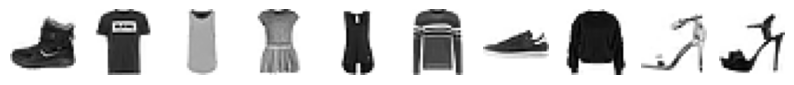

In [11]:
# 맷플롯립 라이브러리를 사용하여 훈련데이터의 첫번째부터 열번째 이미지까지 출력
fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [ ]:
# 모델의 입력 샘플의 크기를 (28, 28, 1)로 지정했으므로 train_input의 마지막에 차원을 하나 더 추가하여 (60000, 28, 28, 1)로 변환
#   - 1: 첫 번째 차원의 크기는 60000으로 써도 되지만, 파이썬 프로그래머들은 종종 이렇게 특정 차원에 해당하는 값을 비워놓고 매서드에서 채우도록 한다.
# 픽셀은 0~255 사이의 정수값인데, 신경망은 0~1 혹은 -1~1 사이에서 작 작동하므로  255로 나누어 0~1 사이의 실수값으로 변환
train_input = train_input.reshape(-1, 28, 28, 1) / 255

In [13]:
# 테스트 세트는 훈력에서 사용하지 않기 때문에, 모델이 훈련 세트에 잘 훈련되었는지 비교하기 위해 별도의 데이터 세트가 필요
#   - 검증 세트(validation set) : 훈련 세트에서 20% 떼어내어 만듦
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

3. 모델 훈련하기
   - 모델을 컴파일하고 훈련을 시작한다.
   - 케라스 콜백을 사용하여 훈련 도중 최상의 모델을 저장
   - 검증 세트에 대한 손실이 증가하기 전에 조기 종료하여 과대적합을 막는다.
   
      *) 과대적합: 모델이 훈련 세트에 너무 과하게 맞춰져서 테스트 세트에서 성능이 떨어지는 현상

In [14]:
# save_best_only=True: 검증 세트의 점수가 가장 좋을 때의 모델만 저장
checkpoint_cb = keras.callbacks.ModelCheckpoint('lenet5-model.h5', save_best_only=True)

# patience=2: 검증 세트의 점수가 개선되지 않고 2회 연속 증가하면 훈련을 멈춤
# restore_best_weights=True: 훈련이 끝난 후 가장 성능이 좋았던 모델의 가중치를 복원     
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

# saprse_categorical_crossentropy: 정수로 된 타깃을 원-핫 인코딩으로 변환하지 않고 사용
# accuracy: 훈련과 검증에서 정확도를 모니터링
lenet5.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 검증 세트로 모델을 평가하면서 20에포크 동안 훈련
# callbacks 매개변수에 앞에서 만든 체크포인트와 조기 종료 콜
hist = lenet5.fit(train_scaled, train_target, epochs=20, 
                  validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1497/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4556 - loss: 1.4661

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6151 - loss: 1.0329 - val_accuracy: 0.7257 - val_loss: 0.7043
Epoch 2/20
1473/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7377 - loss: 0.6715

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7472 - loss: 0.6473 - val_accuracy: 0.7491 - val_loss: 0.6409
Epoch 3/20
1489/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7786 - loss: 0.5823

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7838 - loss: 0.5682 - val_accuracy: 0.7878 - val_loss: 0.5515
Epoch 4/20
1488/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8047 - loss: 0.5150

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8087 - loss: 0.5055 - val_accuracy: 0.8122 - val_loss: 0.5009
Epoch 5/20
1498/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8223 - loss: 0.4766

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8269 - loss: 0.4641 - val_accuracy: 0.8339 - val_loss: 0.4513
Epoch 6/20
1478/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8344 - loss: 0.4436

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8379 - loss: 0.4347 - val_accuracy: 0.8371 - val_loss: 0.4442
Epoch 7/20
1498/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8453 - loss: 0.4176

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8475 - loss: 0.4113 - val_accuracy: 0.8569 - val_loss: 0.3940
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8541 - loss: 0.3938 - val_accuracy: 0.8522 - val_loss: 0.4060
Epoch 9/20
1498/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8611 - loss: 0.3806

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8600 - loss: 0.3789 - val_accuracy: 0.8652 - val_loss: 0.3698
Epoch 10/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8650 - loss: 0.3656 - val_accuracy: 0.8569 - val_loss: 0.3926
Epoch 11/20
1488/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8705 - loss: 0.3512

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8689 - loss: 0.3533 - val_accuracy: 0.8692 - val_loss: 0.3665
Epoch 12/20
1481/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8720 - loss: 0.3491

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8736 - loss: 0.3417 - val_accuracy: 0.8719 - val_loss: 0.3524
Epoch 13/20
1476/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8738 - loss: 0.3350

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8754 - loss: 0.3333 - val_accuracy: 0.8763 - val_loss: 0.3417
Epoch 14/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8773 - loss: 0.3258 - val_accuracy: 0.8749 - val_loss: 0.3497
Epoch 15/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8814 - loss: 0.3193 - val_accuracy: 0.8758 - val_loss: 0.3445


4. 모델 성능확인하기
   - hist 객제에 저장된 손실과 정확도를 그래프로 그려서 모델의 성능 확인

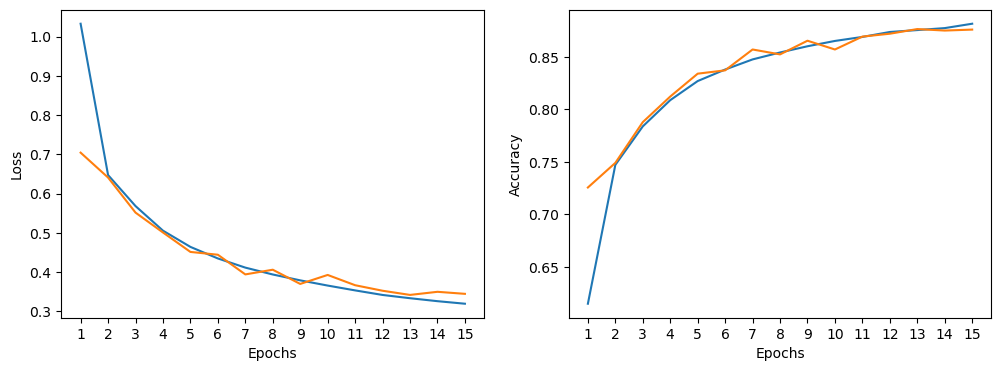

In [15]:
epochs = range(1, len(hist.history['loss']) + 1)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(epochs, hist.history['loss'])
axs[0].plot(epochs, hist.history['val_loss'])
# set_xticks: x축 눈금 표시 - 1.5 단위가 없기 때문에 명확하게 보이도록 1 단위로 설정
axs[0].set_xticks(epochs)
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')

axs[1].plot(epochs, hist.history['accuracy'])
axs[1].plot(epochs, hist.history['val_accuracy'])
axs[1].set_xticks(epochs)
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
plt.show()